# 사이킷 런을 활용한 DFM/ TF-IDF

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'I love you',
    'you know I want your love',
    'what should Ido'
]
#vector = Countvectorizer(stop_words={'do'}).fit(corpus)  stop_words를 통해 제거 가능
vector = CountVectorizer() # shift + tap을 누르면 파라메타 값 확인 가능
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여줌

[[0 0 1 0 0 0 1 0]
 [0 1 1 0 1 0 1 1]
 [1 0 0 1 0 1 0 0]]
{'love': 2, 'you': 6, 'know': 1, 'want': 4, 'your': 7, 'what': 5, 'should': 3, 'ido': 0}


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    '품질 정말 대박',
    '써보니 품질 믿을만 하네요',
    '품질도 좋은데 서비스도 좋아요'
]
tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.62276601 0.         0.         0.         0.62276601 0.
  0.         0.4736296  0.         0.        ]
 [0.         0.52863461 0.         0.52863461 0.         0.
  0.         0.40204024 0.         0.52863461]
 [0.         0.         0.5        0.         0.         0.5
  0.5        0.         0.5        0.        ]]
{'품질': 7, '정말': 4, '대박': 0, '써보니': 3, '믿을만': 1, '하네요': 9, '품질도': 8, '좋은데': 6, '서비스도': 2, '좋아요': 5}


- 한글의 경우에는 tf-idf를 하기 위해서는 형태소 분석을 통해 조사나 필요없는 단어를 제거한 후 구하는 것이 좀 더 정확한 결과를 얻을 수 있음

# 문서 유사도

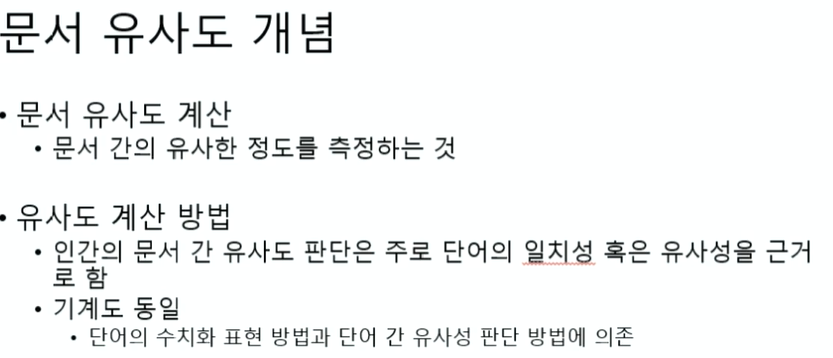

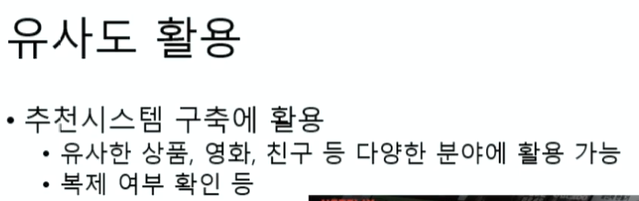

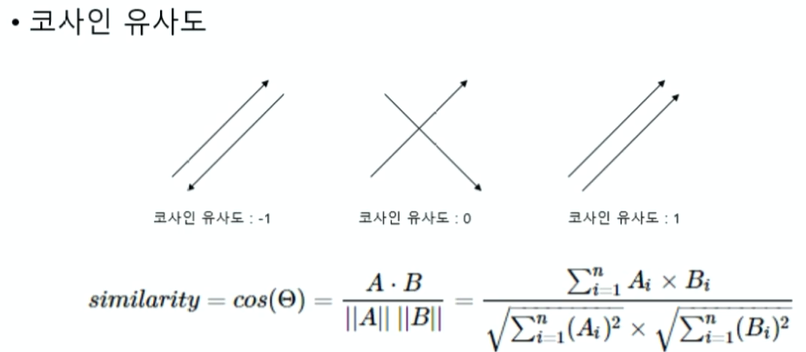

In [81]:
from numpy import dot # 행렬 연산을 위해
from numpy.linalg import norm # 벡터의 길이를 구하기 위해
import numpy as np
def cos_sim(A,B):
    return dot(A,B) / (norm(A)*norm(B)) # dot는 두개의 행렬의 곱을 구하기 위함, norm은 벡터의 길이를 구하기 위해

In [82]:
a = [3,4]
b = [-1,2]

In [84]:
print(cos_sim(a,b))

0.4472135954999579


In [11]:
doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

In [12]:
print(cos_sim(doc1,doc2))# 문서1과 문서2의 코사인 유사도
print(cos_sim(doc1, doc3))# 문서1과 문서3의 코사인 유사도
print(cos_sim(doc2, doc3)) # 문서2와 문서 3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


- 2와 3이 1인 나오는 이유는 문서 3이 문서 2의 내용에 *2여서

- 컴퓨터는 텍스트 자체를 이해하는 것이 아닌 벡터를 인식하는 것이기 때문에 벡터로 변환 후 유사도를 분석할 수 있음
- term frequency나 tf_idf 둘다 문서를 벡터화 하는 과정

## countVectorizer

In [27]:
import pandas as pd
pd.options.mode.chained_assignment = None # 처리속도 증가

import numpy as np
np.random.seed(0)

from konlpy.tag import Okt # 형태소 분석기
okt = Okt()

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # Tfidf vectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity # cosine 유사도 측정

# tokenizer : 문장에서 색인어 추출을 위해 명사, 동사, 알파벳, 숫자 정도의 단어만 뽑아서 normalization, stemming
def tokenizer(raw, pos=["Noun", "Alpha", "Verb", "Number"], stopword=[]):
    return [
        word for word, tag in okt.pos(
        raw,
        norm=True, #  normalize 그랰ㅋㅋ -> 그래ㅋㅋ
        stem=True  # stemming 바뀌니 -> 바뀌다 / 동사의 기본형을 뜯어냄
        )
        if len(word) > 1 and tag in pos and word not in stopword
    ]

# 테스트 문장
rawdata = [
    '[커버스토리] 10년 후에 더 잘 나가는 미래 보장 유망직업',
    '멀지않은 미래에 이 직업 뜬다 - 직업별 전망·연봉·만족도 Top 30 - 에듀진',
    '4차 산업혁명 시대에 살아남는 방법 - 브런치',
    '[좌충우돌 일자리]연봉 1억 4000 이하로 떨어지지 않는 직업',
    '제4차 산업혁명 시대, 미래사회 변화에 대한 전략적 대응 방안 모색',
    '2024년 미래유망직업 25가지, 1위는 PA, 소프트웨어 개발자가 가장 인기있는 이유',
    '[TECH웨이브] 올해 가장 주목받을 IT 기술은 AI와 메타버스'
]

In [28]:
vectorize = CountVectorizer(
    tokenizer=tokenizer,
    min_df=2 # 예제로 보기 좋게 1번 정도만 노출되는 단어들 무시
             # min_df = 0.01 : 문서의 1%미만으로 나타나는 단어 무시
             # min_df = 10 : 문서에 10개 미만으로 나타나는 단어 무시
             # max_df = 0.80 : 문서의 80% 이상에 나타나는 단어 무시
             # max_df = 10 : 10개 이상의 문서에 나타나는 단어 무시
)
# 문장에서 노출되는 feature(,특징이 될만한 단어) 수를 Document Term Matrix(이하 DTM) 을 리턴
X = vectorize.fit_transform(rawdata)

print(X.toarray())

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()
print(features)

# DTM 구축

[[0 1 0 0 0 0 1 1]
 [0 1 0 0 1 1 0 2]
 [0 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 1]
 [0 1 1 1 0 0 0 0]
 [1 1 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0]]
['가장', '미래', '산업혁명', '시대', '않다', '연봉', '유망', '직업']


C:\Users\alsgu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
# 새로운 문장에 대해 해당 문장과 비슷한 문서를 추출해보자
srch = [t for t in tokenizer('미래 가장 인기있는 직업') if t in features]
print(srch)

# dtm 에서 검색하고자 하는 feature만 뽑아낸다.
srch_dtm = np.asarray(X.toarray())[:,[
    # vectorize.vocabulary_get 은 특정 feature가 dtm에서 가지고 있는 index값 리턴
    vectorize.vocabulary_.get(i) for i in srch
]]

['미래', '가장', '직업']


In [30]:
srch_dtm

array([[1, 0, 1],
       [1, 0, 2],
       [0, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=int64)

In [31]:
score = srch_dtm.sum(axis = 1)
print(score)
# array([0,0,3,2,3], dtype=int64) 문장별 feature 합계 정수

for i in score.argsort()[::-1]:
    if score[i] > 0:
        print('{} / score : {}' .format(rawdata[i],score[i]))

[2 3 0 1 1 3 1]
2024년 미래유망직업 25가지, 1위는 PA, 소프트웨어 개발자가 가장 인기있는 이유 / score : 3
멀지않은 미래에 이 직업 뜬다 - 직업별 전망·연봉·만족도 Top 30 - 에듀진 / score : 3
[커버스토리] 10년 후에 더 잘 나가는 미래 보장 유망직업 / score : 2
[TECH웨이브] 올해 가장 주목받을 IT 기술은 AI와 메타버스 / score : 1
제4차 산업혁명 시대, 미래사회 변화에 대한 전략적 대응 방안 모색 / score : 1
[좌충우돌 일자리]연봉 1억 4000 이하로 떨어지지 않는 직업 / score : 1


## TfidfVectorizer

In [35]:
vectorize = TfidfVectorizer(
    tokenizer = tokenizer,
    min_df=2,

    sublinear_tf=True   # tf값에 1+log(tf)를 적용하여 tf값이 무한정 커지는 것을 막음
)
X = vectorize.fit_transform(rawdata)

print(
    'fit_transform, (sentence {}, feature {})'.format(X.shape[0], X.shape[1])
)
# fit_transform, (sentence 5, feature 7)

print(X.toarray())

# 문장에서 뽑아낸 feature 들의 배열
features = vectorize.get_feature_names()

fit_transform, (sentence 7, feature 8)
[[0.         0.51192903 0.         0.         0.         0.
  0.68982414 0.51192903]
 [0.         0.3651908  0.         0.         0.49209444 0.49209444
  0.         0.61832177]
 [0.         0.         0.70710678 0.70710678 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.62613405 0.62613405
  0.         0.46466364]
 [0.         0.46466364 0.62613405 0.62613405 0.         0.
  0.         0.        ]
 [0.56782721 0.42139324 0.         0.         0.         0.
  0.56782721 0.42139324]
 [1.         0.         0.         0.         0.         0.
  0.         0.        ]]


C:\Users\alsgu\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [36]:
print(features)

['가장', '미래', '산업혁명', '시대', '않다', '연봉', '유망', '직업']


In [37]:
# 검색 문장에서 feature를 뽑아냄
srch = [t for t in tokenizer('미래 가장 인기있는 직업') if t in features]
print(srch)

# dtm 에서 검색하고자 하는 feature만 뽑아낸다.
srch_dtm = np.asarray(X.toarray())[:,[
    # vectorize.vocabulary_get 은 특정 feature가 dtm에서 가지고 있는 index값 리턴
    vectorize.vocabulary_.get(i) for i in srch
]]
print(srch_dtm)

['미래', '가장', '직업']
[[0.51192903 0.         0.51192903]
 [0.3651908  0.         0.61832177]
 [0.         0.         0.        ]
 [0.         0.         0.46466364]
 [0.46466364 0.         0.        ]
 [0.42139324 0.56782721 0.42139324]
 [0.         1.         0.        ]]


In [39]:
score = srch_dtm.sum(axis = 1)
print(score)

for i in score.argsort()[::-1]:
    if score[i] > 0:
        print('{} / score : {}' .format(rawdata[i],score[i]))

[1.02385805 0.98351256 0.         0.46466364 0.46466364 1.41061369
 1.        ]
2024년 미래유망직업 25가지, 1위는 PA, 소프트웨어 개발자가 가장 인기있는 이유 / score : 1.4106136866728383
[커버스토리] 10년 후에 더 잘 나가는 미래 보장 유망직업 / score : 1.0238580518853728
[TECH웨이브] 올해 가장 주목받을 IT 기술은 AI와 메타버스 / score : 1.0
멀지않은 미래에 이 직업 뜬다 - 직업별 전망·연봉·만족도 Top 30 - 에듀진 / score : 0.9835125631756176
제4차 산업혁명 시대, 미래사회 변화에 대한 전략적 대응 방안 모색 / score : 0.4646636390603675
[좌충우돌 일자리]연봉 1억 4000 이하로 떨어지지 않는 직업 / score : 0.4646636390603675


# Word2vec

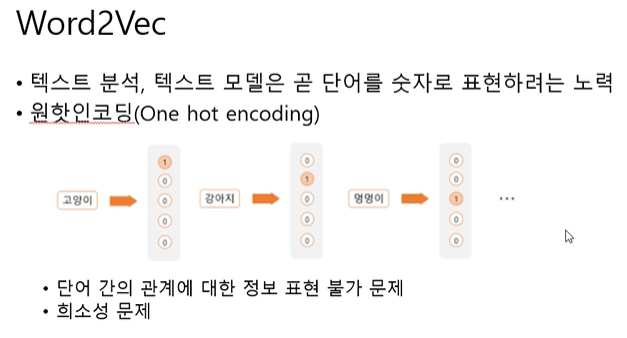

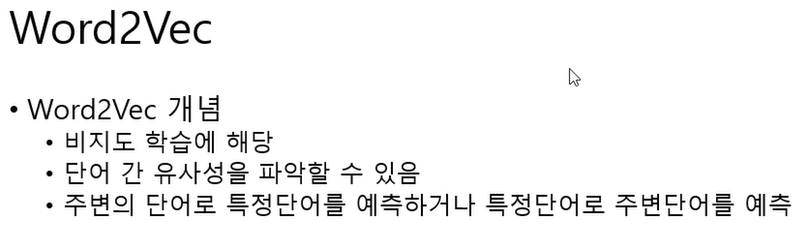

## 그래프 예제

In [77]:
!pip3 install gensim==3.8.3

In [78]:
from gensim.models import Word2Vec

# 형태소 분석 완료
sentences = [
                ['this', 'is','a','good','product'],
                ['it', 'is','a', 'excellent','product'],
                ['it','is','a', 'bad', 'product'],
                ['that', 'is', 'the', 'worst', 'product']
            ]


# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, vector_size = 300, window=3, min_count=1,workers=1)

# 단어 벡터를 구한다.
word_vectors = model.wv

vocabs =list(word_vectors.index_to_key)
word_vectors_list = [word_vectors[v] for v in vocabs]

# 단어간 유사도를 확인한다.
print(word_vectors.similarity(w1='that',w2='product')) # 유사성은 높지 않다
print(word_vectors.similarity(w1='good',w2='excellent'))
print(word_vectors.similarity(w1='worst',w2='bad'))

-0.013968135
-0.058753774
0.12232457


In [53]:
print(vocabs)

['product', 'is', 'a', 'it', 'worst', 'the', 'that', 'bad', 'excellent', 'good', 'this']


In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

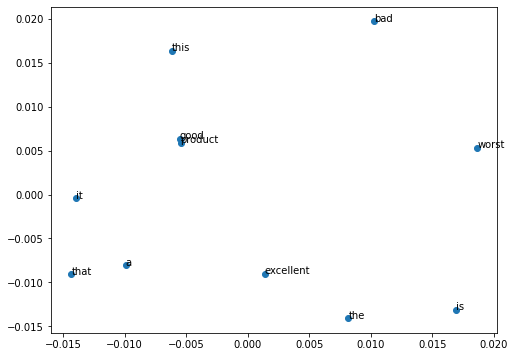

In [57]:
#단어와 2차원 X축의 값, Y축으로 2차원 그래프를 그린다
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.scatter(xs,ys,marker='o')
for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(xs[i], ys[i]))

## 영화 리뷰 예제

In [58]:
import requests
import pandas as pd
import re
import time
from bs4 import BeautifulSoup
# 평점 높은순과 평점 낮은순
pre = 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.naver?code=45290&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
review=[]
rate=[]

cnt=0
# 각각 300개의 평점 크롤링
for i in range(1,4890, 5):
    time.sleep(0.1)
    
    site = pre + str(i)
    res = requests.get(site)
    soup = BeautifulSoup(res.content,'html.parser')
    
    id_list = []
    id_pre = '_filtered_ment_'
    
    for i in range(10):
        id_list.append(id_pre+str(i))
   
    for id in id_list:
        review.append(soup.find('span',{'id':id}).get_text().strip())
        
    rate_list = []
    rate_list = (soup.select('div.star_score > em'))
    
    for r in rate_list:
        r = int(re.sub('<.+?>','',str(r)))
        rate.append(r)

        
df = pd.DataFrame({'review':review,'rate':rate})

In [59]:
df.to_csv('review.csv')

In [60]:
import matplotlib.pyplot as plt
import urllib.request

In [62]:
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

train_data = pd.read_csv('review.csv')
train_data[:5]

,Unnamed: 0,review,rate
0,0,"인셉션은 대단하다 느꼈는데, 인터스텔라는 경이롭다고 느껴진다.",10
1,1,결론만 말하자면 대박이다 더이상 어떤단어로 칭찬해야하는지도모르겠다.약 3시간의 긴러...,10
2,2,전율과 환희의 169분이였다. 그 어떤 영화도 시도한 적 없는 명석함과 감동이 담겨...,10
3,3,이 영화가 명량이나 도둑들보다 관객수가 적다면 진짜 부끄러울듯,10
4,4,"팝콘, 콜라 사가지 마라.. 먹을시간 없다",10


In [63]:
train_data = train_data.dropna(how = 'any')# 널값 행 제거
print(train_data.isnull().values.any()) # 널값 확인

False


In [65]:
train_data['review'] = train_data['review'].str.replace("[^ㄱ-하-ㅣ가-힣]","")
train_data[:5]

C:\Users\alsgu\AppData\Local\Temp/ipykernel_24676/915215856.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['review'] = train_data['review'].str.replace("[^ㄱ-하-ㅣ가-힣]","")


,Unnamed: 0,review,rate
0,0,인셉션은대단하다느꼈는데인터스텔라는경이롭다고느껴진다,10
1,1,결론만말하자면대박이다더이상어떤단어로칭찬해야하는지도모르겠다약시간의긴러닝타임이지만시간가...,10
2,2,전율과환희의분이였다그어떤영화도시도한적없는명석함과감동이담겨있었다이영화를만들어낸놀란의야...,10
3,3,이영화가명량이나도둑들보다관객수가적다면진짜부끄러울듯,10
4,4,팝콘콜라사가지마라먹을시간없다,10


In [79]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를',
            '으로','자','에','와','한','하다']
#형태소 분석기를 활용한 토큰화 작업(시간이 다소 소요)
okt = Okt()
tokenized_data=[]

for sentences in train_data['review']:
    temp_X = okt.morphs(sentences, stem = True)# 토큰화
    temp_x = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [80]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이:' ,max(len(I) for I in tokenized_data))
print('리뷰의 평균 길이:', sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([lenen(s) for sum in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

리뷰의 최대 길이: 62
리뷰의 평균 길이: 14.104408591100606


NameError: name 'lenen' is not defined

In [ ]:
from gensim.models. import Word2vec
model = Word2vec(sentences = tokenized_data, vector_size = 100, window = 5,min_count=5, workers = 4, sg=0)
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

In [ ]:
print(model.wv.most_similar("놀란"))